## Project 3 House Price Prediction
Type of ML: Supervised Learning <br>
Type of SL: Regression <br>
Type of BC: XGBoost Regressor <br>

### Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets #Will get the Boston Housing Price but it has been removed so I have downloaded the csv
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Importing the Boston Housing Price Dataset

In [11]:
house_price_dataset = pd.read_csv('data/boston.csv')
print(house_price_dataset.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [12]:
# Checking the number of rows and columns in the dataset
house_price_dataset.shape

(506, 14)

In [14]:
# Check for missing values 
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
# Statistical Measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Understand the correlation between various features in the dataset 
There are two types of correlation(relationship between two variables meaning how a variable value increase or decrease affects the other correlated variable): <br>
1. Positive Correlation
2. Negative Correlation 

In [17]:
correlation = house_price_dataset.corr()

<Axes: >

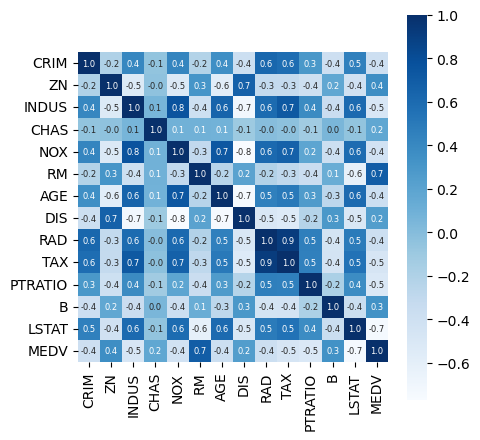

In [32]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (5, 5))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 6}, cmap = 'Blues')
# cbar is color bar which shows all values gradient color from 1.0 till -08
# square will show the values in square for each variable
# fmt is "how many float value I want" which is just 1 here i.e. 0.1 & so
# annot means annotation basically the value written in each box in the heatmap like 1.0...etc
# annot_kws is text size of the annotation
# cmap is the color of the heatmap

### Splitting the Data and Target

In [33]:
X = house_price_dataset.drop(['MEDV'], axis = 1)
y = house_price_dataset['MEDV']

### Splitting Data into Training and Test Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Model Training (XGBoost Regressor) 
Fun Fact: XGBoost Regressor is kind of a Decision Tree

In [39]:
# Loading the Model
model = XGBRegressor()

In [40]:
# Training the model which simply means fitting the data in the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluation
We cannot find the accuracy score for this so we have to use metrics

### Prediction on Training Data

In [41]:
# Accuracy for predicting on training data
training_data_prediction = model.predict(X_train)

In [42]:
# R Squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error:", score_1)
print("Mean Absolute error:", score_2)

R squared error: 0.9999980039471451
Mean Absolute error: 0.0091330346494618


### Visualizing the actual prices and predicted prices

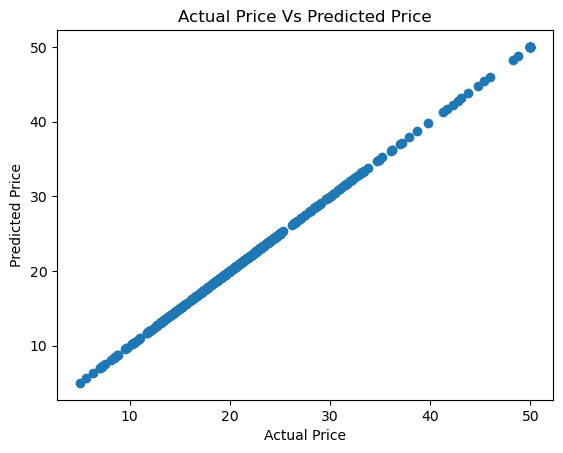

In [47]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

### Prediction on Test Data

In [43]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [44]:
# R Squared error
score_3 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute error
score_4 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R Sqaured error:", score_3)
print("Mean Absolute error:", score_4)

R Sqaured error: 0.9051721149855378
Mean Absolute error: 2.0748727686264927
